In [12]:
import pandas as pd

In [13]:
import pandas as pd

In [14]:
ds = pd.read_csv('./datasets/dataset_1.csv')

In [15]:
ds

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,2.682928,-1.921707,12.535769,3.143079,17.242673,-15.326773,-1.287580,2.615977,5.865415,1.028523
1,2.731492,1.703527,25.627443,3.049180,-7.118783,9.542596,-1.877562,1.990318,-17.750792,-1.881799
2,1.649459,-1.645280,-2.595233,1.736507,11.624251,-5.857365,2.676242,1.478787,5.354777,-2.041877
3,2.813641,-1.293421,11.988423,3.029592,11.587316,-1.054835,2.526702,2.832780,6.128394,-0.480675
4,-1.647996,-2.451675,-17.701478,-1.422254,5.687245,-13.364534,-0.933121,-1.846154,17.994968,2.552282
...,...,...,...,...,...,...,...,...,...,...
1995,-1.749766,-2.015406,-24.805905,-1.892975,9.971012,-11.424343,-1.019790,-1.264559,9.275539,-8.459244
1996,2.181691,2.646238,27.244998,2.321819,-13.435375,20.023165,1.936682,2.237916,-15.224604,-0.401693
1997,-2.193252,-0.910223,-12.579004,-2.606085,0.939725,-8.302054,-2.374750,-3.132139,11.504971,-0.844087
1998,2.472281,-0.976801,10.053867,2.189724,10.949010,1.229931,2.537816,2.044338,4.458140,-1.172038


In [16]:
ds.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.132475,0.330251,2.135484,0.154473,-1.706836,2.399385,0.438844,0.114270,-1.832247,0.070586
std,2.094268,2.112995,15.410647,2.145324,12.705439,12.345419,2.085914,2.137466,11.752621,2.906607
min,-2.499747,-2.499057,-28.982018,-3.591066,-28.275148,-24.706521,-2.499446,-4.020498,-24.257809,-14.871130
25%,-1.962300,-1.910864,-11.161440,-1.876556,-13.437031,-9.401998,-1.823289,-1.904117,-12.778001,-1.079959
50%,-0.466145,0.974465,1.691996,-0.327906,-3.746059,4.132999,1.295293,-0.426165,-4.098885,-0.040592
75%,2.358352,2.468340,15.249803,2.273147,10.493858,13.686585,2.474435,2.248312,9.720245,0.997237
max,2.999326,2.999784,37.630601,4.593953,24.052231,26.528812,2.999581,4.222759,19.508332,20.703203


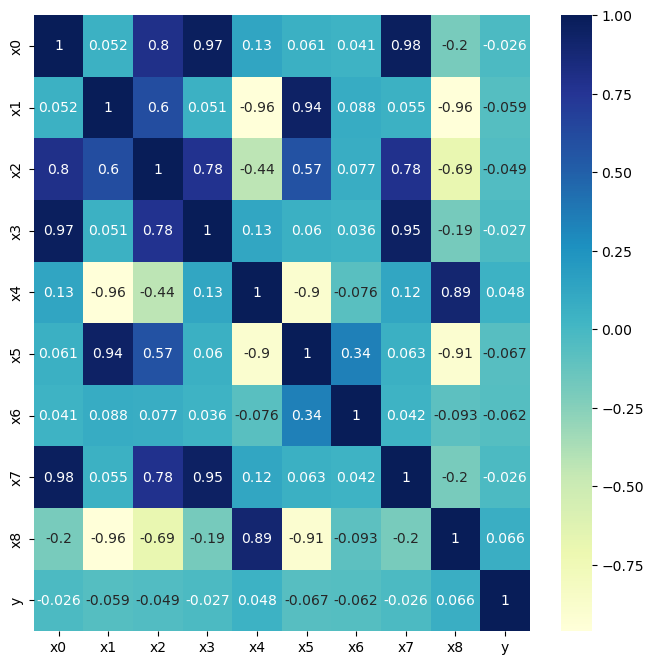

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb
fig, axs = plt.subplots(1,1, figsize= (8, 8))
dataplot = sb.heatmap(ds.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [18]:
Z = ds.to_numpy()
X, y = Z[:, : -1], Z[:, -1]

from scripts.score import Score
with open(f"dataset_1_best_model") as f_model:
    sc = Score(f_model.read(), X, y)

In [19]:
sc.r2

0.4414736779742702

In [20]:
y_hat = sc.expr.eval(X)



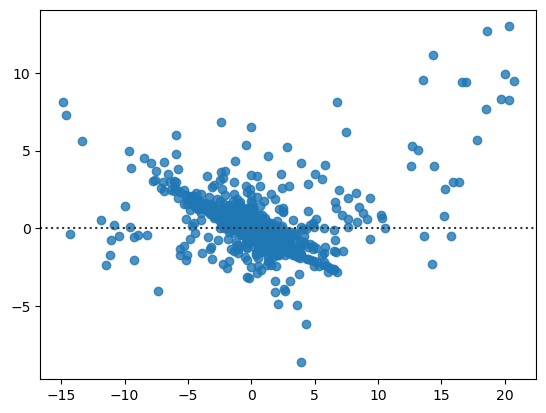

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.residplot(x= y, y= (y_hat - y))
plt.show()

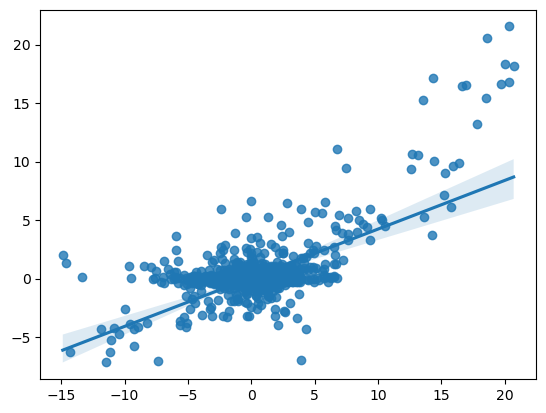

In [22]:
sns.regplot(x= y, y= y_hat)
plt.show()

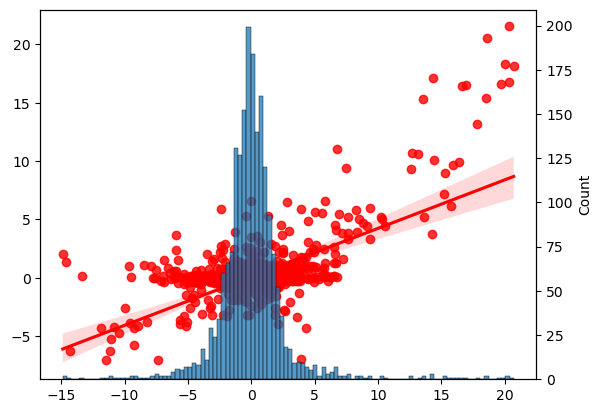

In [23]:
a = sns.regplot(x= y, y= y_hat, color= 'red')
sns.histplot(y, ax= a.axes.twinx())
plt.show()